In [22]:
# !pip install missingno

In [23]:
# import libraries for data cleaning and exploration
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [24]:
# load dataset
customer_churn= pd.read_csv('Customer_Churn_Data_v2.csv')

In [25]:
# print out the 10 random class samples
customer_churn.sample(10)

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
7354,7355,26575.03697,76858.44372,13,0,22,6685.625096,AE_PK,0,0,0,0,2.776065,0
3902,3903,22801.57346,20641.6492,8,0,27,10225.337580,AE_IN,0,0,0,0,0.062062,0
52,53,31786.58036,25840.21097,9,0,23,15405.361390,AE_IN,0,0,0,0,2.433511,0
6417,6418,38425.21998,44657.97045,12,0,24,6472.949748,AE_IN,0,0,0,0,2.611450,0
7080,7081,11427.06317,10907.59608,4,1,31,3807.875547,AE_PK,0,0,0,0,0.558604,0
1579,1580,27709.69334,15148.41716,8,0,22,20601.036020,AE_IN,0,0,0,0,2.113317,0
2894,2895,9637.613149,13940.83364,3,1,24,4580.166300,AE_IN,0,0,0,0,2.569714,0
6544,6545,39442.83522,70111.00211,15,0,28,14734.915160,AE_IN,0,0,0,0,2.493540,0
4711,4712,27241.95112,46759.50083,11,0,20,15888.405660,AE_IN,0,0,0,0,0.803026,0
782,783,21295.79236,23210.17927,7,0,329,8098.422264,AE_IN,0,0,0,0,0.788883,0


In [26]:
# check missing values
customer_churn.isnull().sum()

cust_id                                0
income                                 0
debt_with_other_lenders                0
credit_score                           0
has_previous_defaults_other_lenders    0
num_remittances_prev_12_mth            0
remittance_amt_prev_12_mth             0
main_remittance_corridor               0
opened_campaign_1                      0
opened_campaign_2                      0
opened_campaign_3                      0
opened_campaign_4                      0
tenure_years                           0
churned                                0
dtype: int64

### Check for duplicate values

In [27]:
# check for duplicate samples
customer_churn.duplicated().sum()

0

### Detecting and correcting datatypes and rechecking missing values

In [28]:
# check missing values and datatype
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432 entries, 0 to 7431
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   cust_id                              7432 non-null   int64  
 1   income                               7432 non-null   object 
 2   debt_with_other_lenders              7432 non-null   object 
 3   credit_score                         7432 non-null   object 
 4   has_previous_defaults_other_lenders  7432 non-null   int64  
 5   num_remittances_prev_12_mth          7432 non-null   int64  
 6   remittance_amt_prev_12_mth           7432 non-null   float64
 7   main_remittance_corridor             7432 non-null   object 
 8   opened_campaign_1                    7432 non-null   int64  
 9   opened_campaign_2                    7432 non-null   int64  
 10  opened_campaign_3                    7432 non-null   int64  
 11  opened_campaign_4             

In [29]:
# check the unique categories of remittance corridor
customer_churn.main_remittance_corridor.unique()

array(['AE_IN', 'AE_PK', 'AE_PH'], dtype=object)

In [30]:
# check the unique values of credit scores
customer_churn.credit_score.unique()

array(['20', '17', '2', '5', '3', '7', '1', '8', '9', '4', '6', '12',
       '19', ' ', '11', '13', '14', '16', '10', '15', '18'], dtype=object)

In [31]:
# correct data types of the relevant columns
customer_churn['income'] = pd.to_numeric(customer_churn['income'], errors='coerce')
customer_churn['debt_with_other_lenders'] = pd.to_numeric(customer_churn['debt_with_other_lenders'], errors='coerce') 
customer_churn['credit_score'] = pd.to_numeric(customer_churn['credit_score'], errors='coerce')

In [32]:
# check the data type to ensure its corrected
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432 entries, 0 to 7431
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   cust_id                              7432 non-null   int64  
 1   income                               7199 non-null   float64
 2   debt_with_other_lenders              7137 non-null   float64
 3   credit_score                         7137 non-null   float64
 4   has_previous_defaults_other_lenders  7432 non-null   int64  
 5   num_remittances_prev_12_mth          7432 non-null   int64  
 6   remittance_amt_prev_12_mth           7432 non-null   float64
 7   main_remittance_corridor             7432 non-null   object 
 8   opened_campaign_1                    7432 non-null   int64  
 9   opened_campaign_2                    7432 non-null   int64  
 10  opened_campaign_3                    7432 non-null   int64  
 11  opened_campaign_4             

In [33]:
# Re-check missing values
customer_churn.isnull().sum()

cust_id                                  0
income                                 233
debt_with_other_lenders                295
credit_score                           295
has_previous_defaults_other_lenders      0
num_remittances_prev_12_mth              0
remittance_amt_prev_12_mth               0
main_remittance_corridor                 0
opened_campaign_1                        0
opened_campaign_2                        0
opened_campaign_3                        0
opened_campaign_4                        0
tenure_years                             0
churned                                  0
dtype: int64

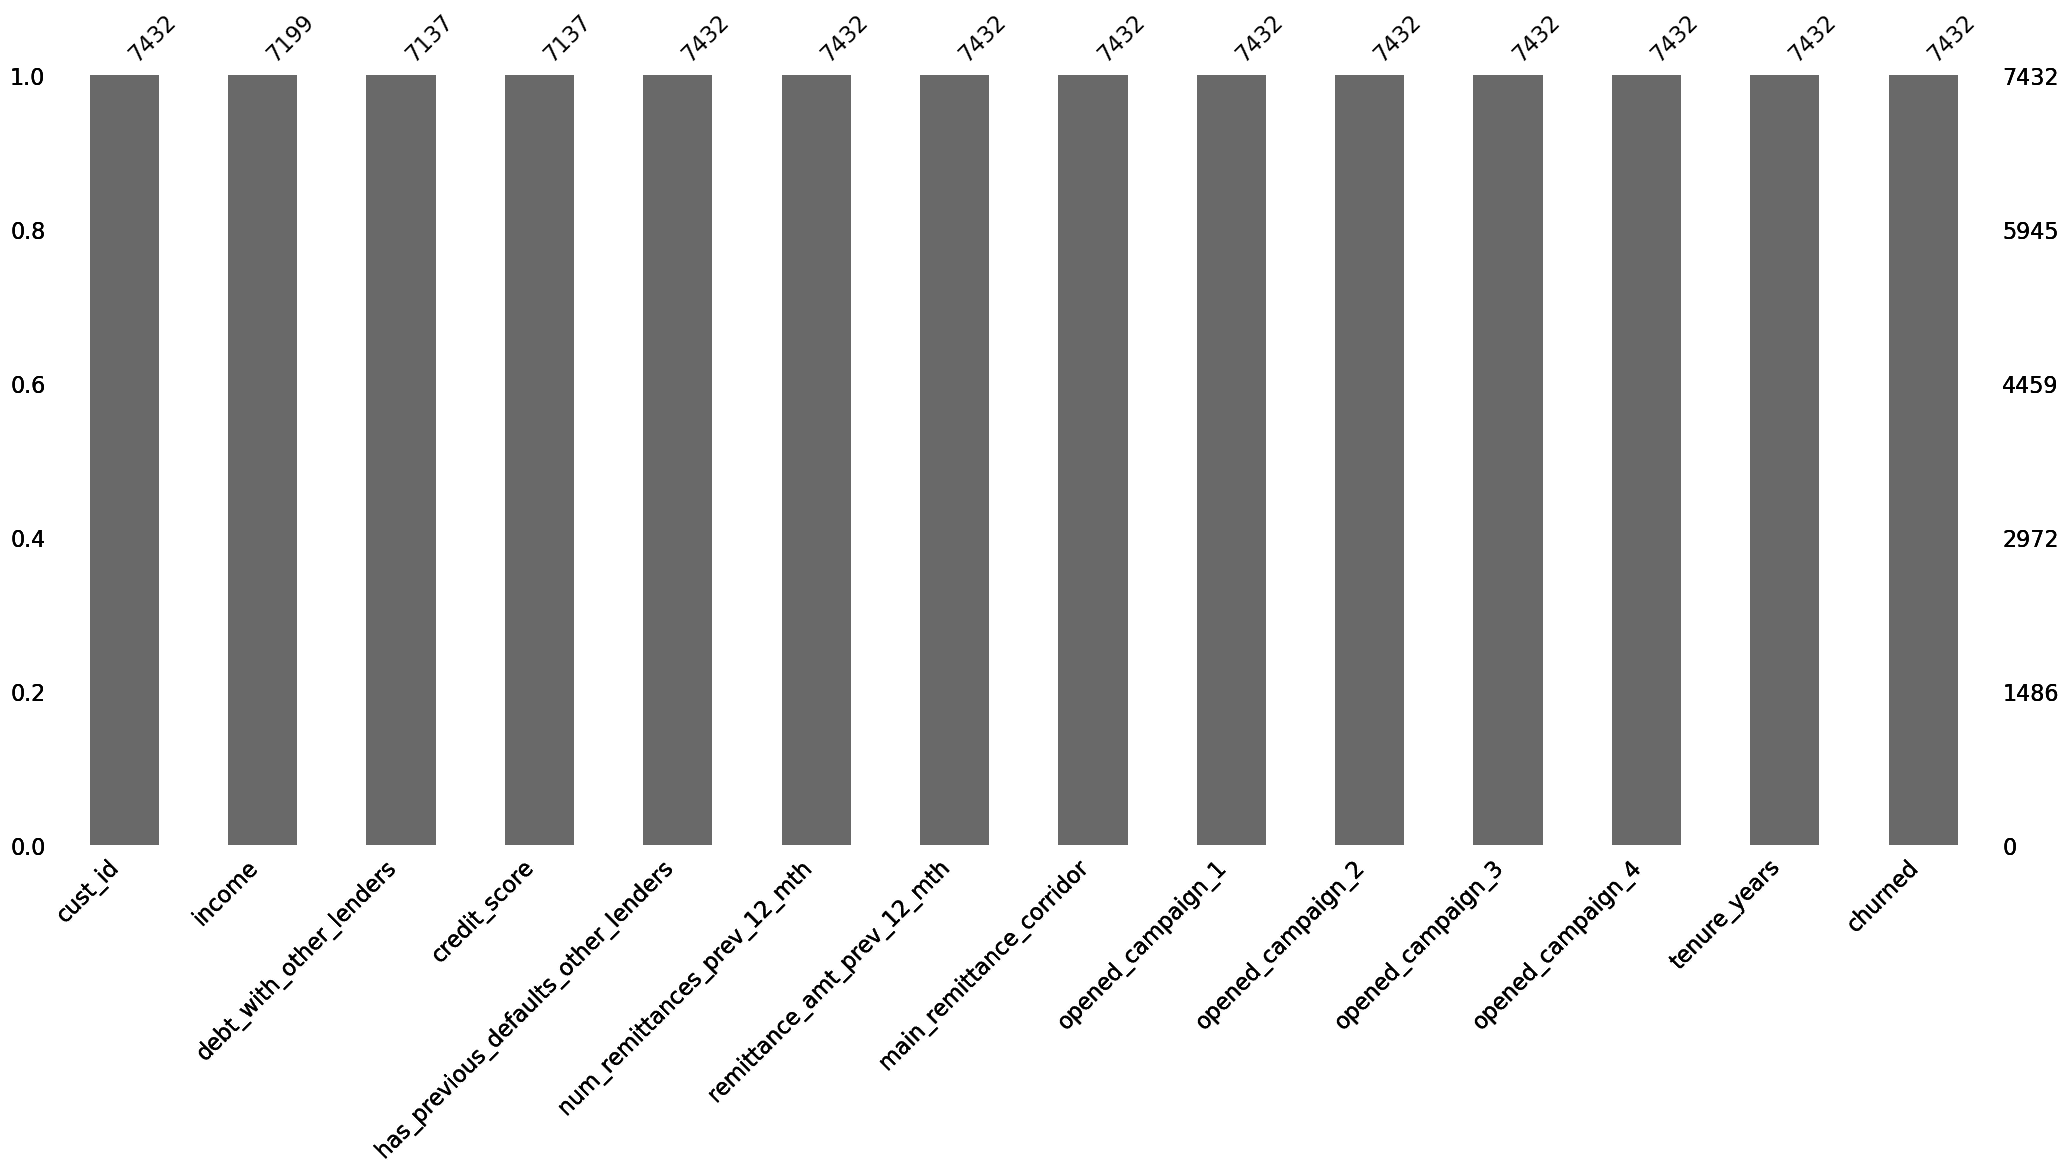

In [34]:
msno.bar(customer_churn)
plt.show()

In [35]:
# Replace missing values with 0
# customer_churn = customer_churn.replace(np.nan, 0, regex=True)
customer_churn = customer_churn.dropna()

In [36]:
# check for missing values
customer_churn.isnull().sum()

cust_id                                0
income                                 0
debt_with_other_lenders                0
credit_score                           0
has_previous_defaults_other_lenders    0
num_remittances_prev_12_mth            0
remittance_amt_prev_12_mth             0
main_remittance_corridor               0
opened_campaign_1                      0
opened_campaign_2                      0
opened_campaign_3                      0
opened_campaign_4                      0
tenure_years                           0
churned                                0
dtype: int64

In [179]:
# check data type, missing values, and the row counts
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432 entries, 0 to 7431
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   cust_id                              7432 non-null   int64  
 1   income                               7432 non-null   float64
 2   debt_with_other_lenders              7432 non-null   float64
 3   credit_score                         7432 non-null   float64
 4   has_previous_defaults_other_lenders  7432 non-null   int64  
 5   num_remittances_prev_12_mth          7432 non-null   int64  
 6   remittance_amt_prev_12_mth           7432 non-null   float64
 7   main_remittance_corridor             7432 non-null   object 
 8   opened_campaign_1                    7432 non-null   int64  
 9   opened_campaign_2                    7432 non-null   int64  
 10  opened_campaign_3                    7432 non-null   int64  
 11  opened_campaign_4             

In [180]:
customer_churn.head(10)

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
0,1,63863.135880,87983.134390,20.0,0,22,23377.338230,AE_IN,0,0,0,0,2.065258,0
1,2,51537.479640,63655.109150,17.0,0,20,8353.525522,AE_PK,0,0,0,0,2.761676,0
2,3,3298.248451,4776.336091,2.0,0,26,1213.782465,AE_PK,0,0,0,0,0.297064,1
3,4,14402.605700,13925.390670,5.0,0,18,6202.880445,AE_IN,0,0,0,0,2.623058,0
4,5,8635.683507,10143.513660,3.0,0,21,6175.393029,AE_PK,0,0,0,0,0.160443,0
5,6,17667.557160,28566.374840,7.0,0,21,6554.790344,AE_PK,0,0,1,0,1.459509,0
6,7,3036.916737,2606.579470,1.0,1,13,1097.500039,AE_IN,0,0,0,0,1.469917,0
7,8,29433.041020,22475.727890,8.0,0,24,8745.330611,AE_PK,0,0,0,1,1.249038,0
8,9,21249.405130,19635.474050,7.0,0,21,3487.648659,AE_IN,0,0,0,0,0.993902,0
9,10,5993.336488,10490.270150,2.0,1,18,3926.341735,AE_IN,0,0,0,1,0.253184,1


### Outlier detection and removal

In [181]:
# detect outliers, if non then save the clean data
pd.crosstab(customer_churn['main_remittance_corridor'], customer_churn['churned'],\
            values=customer_churn['income'], aggfunc='mean').round(2)

churned,0,1
main_remittance_corridor,,
AE_IN,24779.29,10393.28
AE_PH,24088.89,8151.35
AE_PK,24031.26,8633.41


In [182]:
# save clean data
customer_churn.to_csv('cleaned_churned_dataset.csv')